In [1]:
'''
Name   : Rupesh Garsondiya
github : @RupeshGarsondiya
Topic  : Regularization in ANN in Deep-Learning
'''

'\nName   : Rupesh Garsondiya \ngithub : @RupeshGarsondiya\nTopic  : Regularization in ANN in Deep-Learning\n'

#  Regularization

- Regularization is a technique used to reduce the overfitting problem.
- In this method, we add a penalty term to the loss function.

- There are mainly three types of regularization:

    1. L1 Regularization (Lasso)
    2. L2 Regularization (Ridge)
    3. L1 + L2 Regularization (Elastic Net)

- Let's understand each of these in detail.

In [27]:
# import required libary
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

In [48]:
#Load the data
X,y = make_moons(n_samples=800, noise=0.2, random_state=42)

print('x shape : ',X.shape)
print('y shape : ',y.shape)
print()
# split train and  test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x shape :  (800, 2)
y shape :  (800,)

X_train shape :  (640, 2)
X_test shape :  (160, 2)
y_train shape :  (640,)
y_test shape :  (160,)


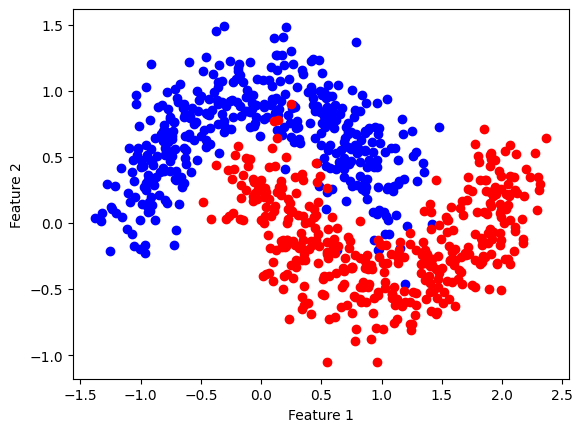

In [49]:
# plot the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

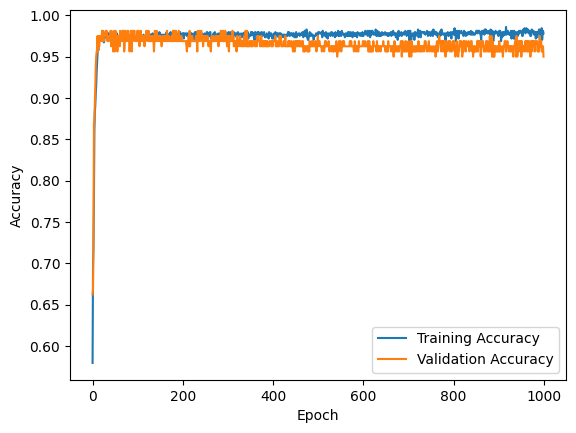

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


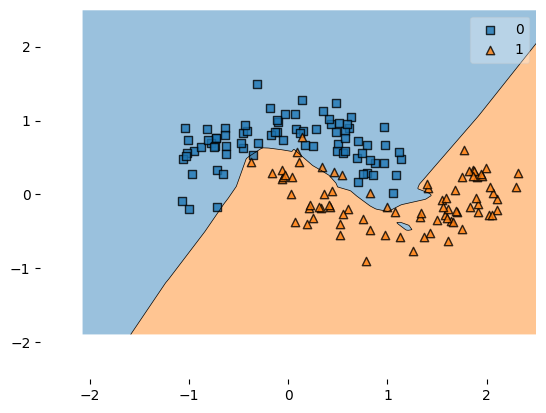

In [50]:
# Train model without regularization
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)

#plot  the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot the decision boundary
plot_decision_regions(X_test, y_test, clf=model)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()

# L1 Regularization

- L1 Regularization is also known as Lasso.
- How it works: Adds the absolute value of weights (∣w∣) as a penalty term to the loss function.

**Equation of Lasso :**

        Loss function: L = Original Loss + λ ∑∣w∣

        where λ is hyperparameter
              w is weight of ANN

- L1 reluarization is  driving some weights to become exactly zero.
- This reluarization use as feature selection

**Advantage :**
1. Produces sparse models by ignoring irrelevant features.
2. Reduces model complexity.

**Disadvantage :**
1. May not perform well when many small weights are needed for good generalization.

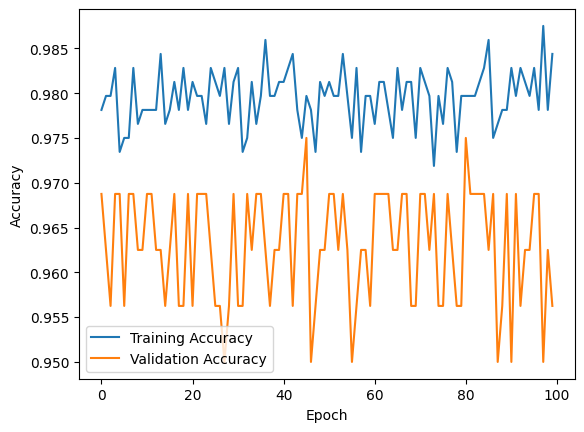

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


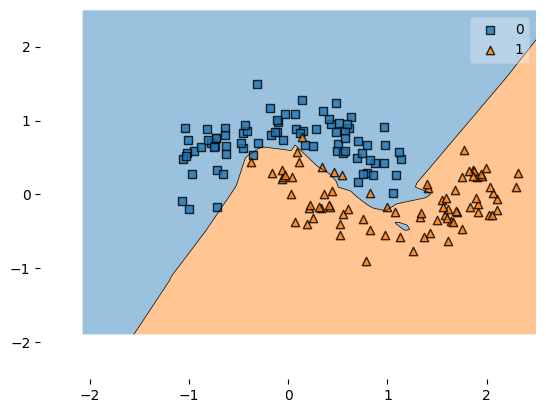

In [51]:
from tensorflow.keras.regularizers import l1
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(2,),kernel_regularizer=l1(0.005)),
    Dense(8, activation='relu',kernel_regularizer=l1(0.004)),
    Dense(8, activation='relu',kernel_regularizer=l1(0.003)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu',kernel_regularizer=l1(0.002)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu',kernel_regularizer=l1(0.001)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0,batch_size=30)

#plot  the accuracy graph
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot the decision boundary
plot_decision_regions(X_test, y_test, clf=model)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()

# here we see that l1 not give the best result


# L2 Reglurization

- L2 and L1 are mostly the same, with a small difference in the penalty term.
- L2 Regularization is also known as Ridge Regularization.
- It adds the square of the weights (w2w2) as a penalty term to the loss function.
- With this technique, weights can never become zero.

**Equation of L2 (Ridge) :**

         Loss function: L = Original Loss + λ ∑w2

         where λ is hyperparameter
**Advantage :**
1. Prevents overfitting by shrinking weights.
2. Handles collinearity better than L1.

**Disadvantage :**
1. Does not enforce sparsity, so all features contribute to the model.

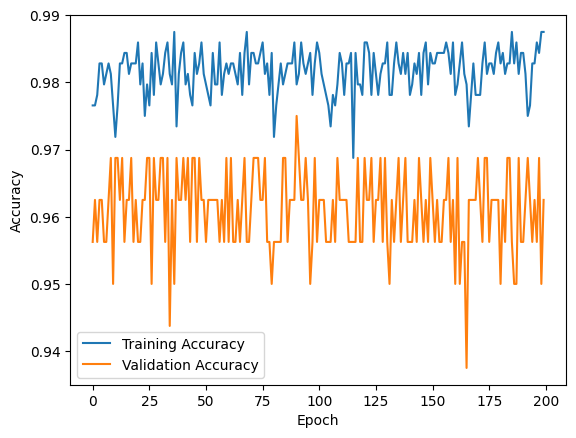

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


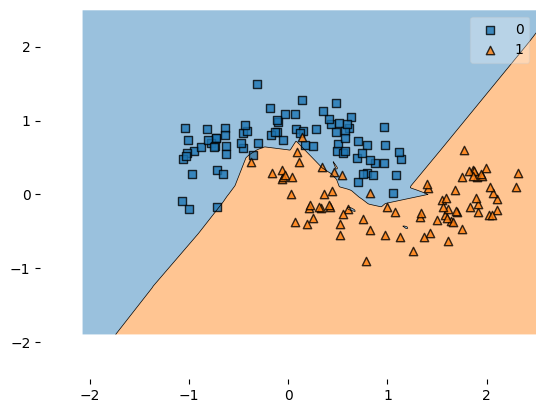

In [52]:
from tensorflow.keras.regularizers import l2
model2 = Sequential([
    Dense(16, activation='relu', input_shape=(2,),kernel_regularizer=l2(0.005)),
    Dense(8, activation='relu',kernel_regularizer=l2(0.004)),
    Dense(8, activation='relu',kernel_regularizer=l2(0.003)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu',kernel_regularizer=l2(0.002)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

#plot  the accuracy graph
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot the decision boundary
plot_decision_regions(X_test, y_test, clf=model)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()